In [160]:
# import necessary libraries 
import pandas as pd
import numpy as np
import os

In [161]:
#owd = os.getcwd()
#os.chdir("Data/employment_data")
# load employment datasets
df1 = pd.read_csv("hourly_payrate.csv", dtype = "int64")
df2 = pd.read_csv("hours_per_week.csv", dtype = "int64")
#df = pd.merge(hourly_payrate, hours_per_week, on = ['ID', ])

In [162]:
df1.head()

,ID,year,job_id,hourly_payrate
0,1,1979,2,328
1,1,1981,2,361
2,2,1979,1,385
3,2,1980,1,457
4,2,1981,1,514


In [163]:
df2.head()

,ID,year,job_id,hours_per_week
0,1,1979,1,15
1,1,1979,2,38
2,1,1981,2,38
3,2,1979,1,35
4,2,1980,1,35


# 1. Explore trends of hourly wage and working hours per week
In this seciton, we explore the averages of hourly wage and working hours per week for each year. We expect that the average hourly wage should increase with year, wheares working hours per week should remain almost unchanged.

In [164]:
# get available years and create a dataframe for aggreagate analysis
years = df2['year'].unique()
years.sort()
df = pd.DataFrame(years, columns = ['year'])

In [165]:
avg_payrate = []
avg_hours = []
for (i, year) in zip(df_avg.index, years):
    avg_payrate.append(df1[df1.year==year]['hourly_payrate'].mean())
    avg_hours.append(df2[df2.year==year]['hours_per_week'].mean())
df['avg_payrate'] = avg_hourly_payrate
df['avg_hours'] = avg_hours_week

In [166]:
df.head()

,year,avg_payrate,avg_hours
0,1979,908.130495,30.348307
1,1980,383.700871,30.245403
2,1981,436.086931,31.356409
3,1982,477.117022,33.104493
4,1983,512.127017,33.840707


Text(0, 0.5, 'average working hours per week ')

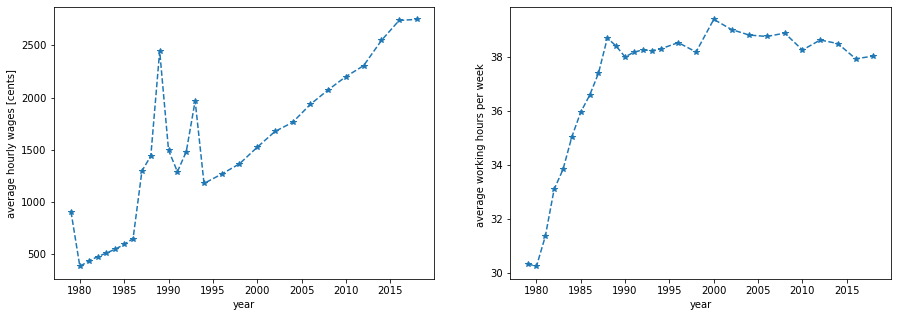

In [167]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(df['year'], df['avg_payrate'], '--*')
plt.xlabel('year')
plt.ylabel('average hourly wages [cents]')
ax2 = fig.add_subplot(1,2,2)
plt.plot(df['year'], df['avg_hours'], '--*')
plt.xlabel('year')
plt.ylabel('average working hours per week ')

The figure above shows that at the average working hours per week first increase and become stable. However, the hourly wages behave strangly for year 1987 - 1993 and 1979. I need to work into the distribution of these years.

# 2. Distribution of hourly wages for year 1987-1993 and 1979
In the previous section, we have seen that avereage hourly wage behaves strangly for year 1987-1993 and year 1979. Specifically, it does not follow the overall trend and is much higher than expected. Therefore, I examine the distribution of hourly wages to see what's happening for these years.

The figure shows that the average hourly wage is overestimated. This suggests that there are some outliers in the hourly wages and the outliers make the average wages unreasonably high. Therefore, I first compute the maximum hourly wage for each year.

In [189]:
for year in years:
    maxval = df1[df1.year==year].hourly_payrate.max()
    print(year, maxval)

1979 3333433
1980 7615
1981 33500
1982 7500
1983 23250
1984 34500
1985 9000
1986 25000
1987 2550000
1988 2600000
1989 4000000
1990 2100000
1991 2400000
1992 3340000
1993 6000000
1994 35000
1996 57692
1998 64903
2000 100000
2002 300000
2004 96153
2006 177884
2008 115384
2010 169573
2012 96153
2014 192307
2016 480769
2018 76923


Now we have validated our hypothesis that outliers leads to the unreasonable high average hourly wage for year 1987-1993. For the following analysis, I will remove the outliers. To remove the outliers, I remove the hourly wage data that's higher than 99% of all the hourly wages for each year. 

In [169]:
# plot distribution of hourly wages for year 1985 - 1995.
avg_payrate_revised = avg_payrate.copy()
for (i, year) in zip(range(len(years)), years):
    if (year>1986 and year<1994) or year==1979:
        q_hi  = df1['hourly_payrate'].quantile(0.99)
        avg_payrate_revised[i]=df1[(df1.year==year) & (df1.hourly_payrate<q_hi)].hourly_payrate.mean()
df['avg_payrate_revised'] = avg_payrate_revised

We plot the original average hourly wage and the average hourly wage after removing outliers. The following figure shows that the average hourly wage follows a very nice increasing trend after removing outliers. Moreover, the average hourly wage remains unchanged for 1980-1986 and 1994-2015.

Text(0, 0.5, 'average hourly payrate [cents]')

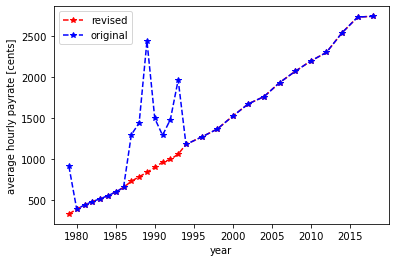

In [170]:
plt.plot(df['year'], df['avg_payrate_revised'], 'r--*', label = 'revised')
plt.plot(df['year'], df['avg_payrate'], 'b--*', label = 'original')
plt.legend()
plt.xlabel('year')
plt.ylabel('average hourly payrate [cents]')

# 3. Save the revised hourly wage data

In [180]:
drop_index = None
for (i, year) in zip(range(len(years)), years):
    if (year>1986 and year<1994) or year==1979:
        q_hi  = df1['hourly_payrate'].quantile(0.99)
        if year!=1979:
            drop_index = df1[(df1.year==year) & (df1.hourly_payrate>=q_hi)].index.union(drop_index)
        else:
            drop_index = df1[(df1.year==year) & (df1.hourly_payrate>=q_hi)].index
print(drop_index)  
print(df1.shape)

Int64Index([   303,    981,   1669,   1807,   1955,   3320,   4484,   5291,
              7403,   7439,
            ...
            284029, 284133, 284403, 284941, 285131, 285326, 285458, 285941,
            286797, 286980],
           dtype='int64', length=415)
(287813, 4)


In [182]:
df_revised = df1.drop(drop_index)
print(df2.shape)

(287398, 4)


In [183]:
avg_payrate_new = []
for (i, year) in zip(df_avg.index, years):
    avg_payrate_new.append(df_revised[df_revised.year==year]['hourly_payrate'].mean())
df['avg_payrate_new'] = avg_payrate_new

Text(0, 0.5, 'average hourly payrate [cents]')

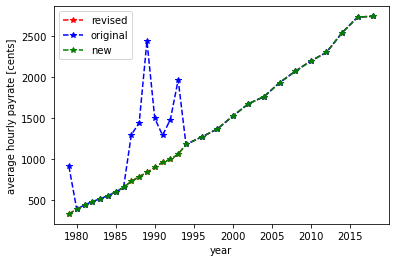

In [186]:
plt.plot(df['year'], df['avg_payrate_revised'], 'r--*', label = 'revised')
plt.plot(df['year'], df['avg_payrate'], 'b--*', label = 'original')
plt.plot(df['year'], df['avg_payrate_new'], 'g--*', label = 'new')
plt.legend()
plt.xlabel('year')
plt.ylabel('average hourly payrate [cents]')

In [187]:
df_revised.to_csv('hourly_payrate_revised.csv', index = False)